In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [2]:
# Show an image contained in an array
def imshow(arr):
    plt.imshow(arr, vmin=0, vmax=255, cmap='gray')
    plt.tight_layout()
    plt.axis('off')
    plt.show()

In [3]:
def _resize_img(arr, width, height):
    return cv2.resize(arr, dsize=(width,height), interpolation=cv2.INTER_CUBIC)

In [20]:
def add_noise(img, noise_type):
    if noise_type == "gauss": # Traitable avec un box filter
        print("putting some gauss")
        mean = 0.0 # at 50, we can remove the background and still have a somehwat good image
        std = 40.0
        noisy_img = img + np.random.normal(mean, std, img.shape)
        out = np.clip(noisy_img, 0, 255) # Clip any out of bound noise
        return out
    elif noise_type == "s&p": # Facilement traitable avec un median filter
        #Add random salt and pepper noise on an image.
        #0 < s_vs_p < 1: 0 being only pepper, 1 being only salt
        #amount: intensity of the noise
        s_vs_p = 0.5
        amount = 0.05
        out = np.copy(img)

        # Salt mode
        num_salt = np.ceil(amount * img.size * s_vs_p)
        print("Salt: {}".format(num_salt))
        coords = [np.random.randint(0, i-1, int(num_salt))
                for i in img.shape]
        out[tuple(coords)] = 1

        # Pepper mode
        num_pepper = np.ceil(amount * img.size * (1. - s_vs_p))
        print("Pepper: {}".format(num_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in img.shape]
        out[tuple(coords)] = 0
        return out
    elif noise_type == "poisson":
        vals = len(np.unique(img))
        vals = 2 ** np.ceil(np.log2(vals))
        out = np.random.poisson(img * vals) / float(vals)
        return out
    elif noise_type =="speckle": # bruit cacarterised par le rayonnement cosmique. Requiert des filtres actifs non-linerais pour traiter
        row,col = img.shape
        gauss = np.random.randn(row,col)
        gauss = gauss.reshape(row,col)        
        out = img + img * gauss
        return out

<h1>Filtering salt and pepper noise on a 400x400 image</h1>

In [5]:
img = cv2.imread("data/M1-67.png")             # Open an image with opencv. Start to run from this line so the noise isn't added on top

In [6]:
img = _resize_img(img, 400, 400)                          # Resizes it to 400x400 pixels

<h2>M1-67 Nebula</h2>

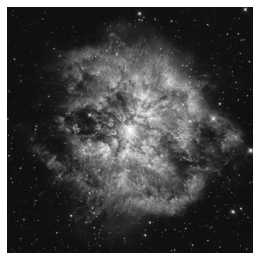

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     # Convert to grayscale
imshow(img)

Salt: 4000.0
Pepper: 4000.0


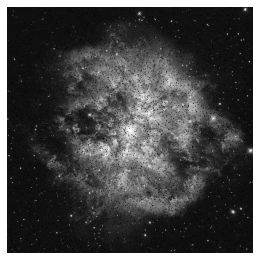

In [146]:
snp = add_noise(img, "s&p")          # Add salt and pepper noise
imshow(snp)

<h3>Box filter</h3>

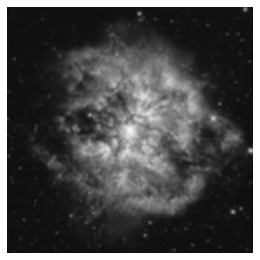

In [147]:
box = cv2.blur(img,(5,5))
imshow(box)

<h3>Gaussian filter</h3>

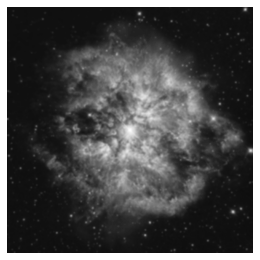

In [148]:
gaussian = cv2.GaussianBlur(img,(5,5),0)
imshow(gaussian)

<h3>Median filter</h3>

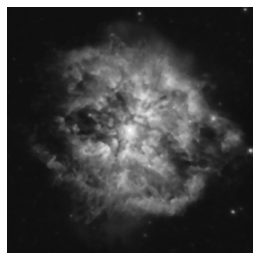

In [149]:
median = cv2.medianBlur(snp, 5)
imshow(median)

<h3>Bilateral filter</h3>

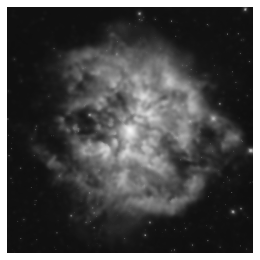

In [150]:
bilat = cv2.bilateralFilter(img, 9, 75, 75)
imshow(bilat)

<h3>2D convolutional filter</h3>

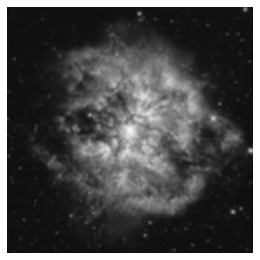

In [151]:
kernel = np.ones((5,5),np.float32)/25
filter2D = cv2.filter2D(img,-1,kernel)
imshow(filter2D)

<h1>Filtering Gaussian noise on a 800x800 image</h1>

In [21]:
img2 = cv2.imread("data/jane_doe.png")
img2 = _resize_img(img2, 800, 800)

<h2>Portrait of Jane Doe</h2>

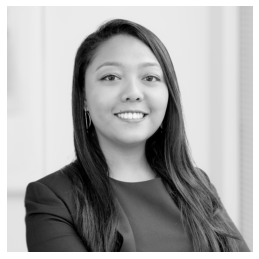

In [22]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
imshow(img2)

putting some gauss


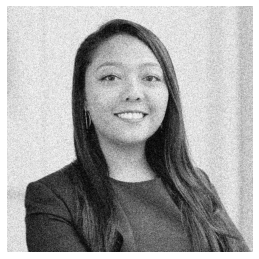

In [23]:
gauss = add_noise(img2, "gauss")
imshow(gauss)

<h3>Box filter</h3>

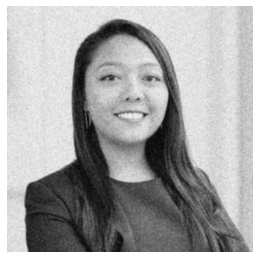

In [24]:
box = cv2.blur(gauss,(5,5))
imshow(box)

<h3>Gaussian filter</h3>

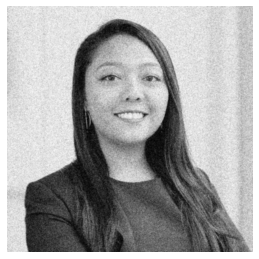

In [25]:
gaussian = cv2.GaussianBlur(gauss,(5,5),0)
imshow(gaussian)

<h3>Median filter</h3>

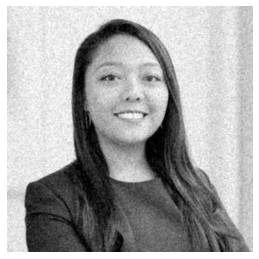

In [26]:
median = cv2.medianBlur(np.float32(gauss), 5)
imshow(median)
# viens vraiment exarceber le blanc de la porte

<h3>Bilateral filter</h3>

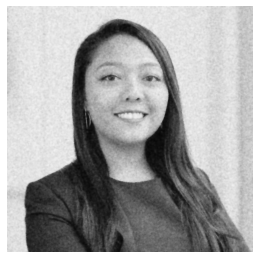

In [27]:
bilat = cv2.bilateralFilter(np.float32(gauss), 9, 75, 75)
imshow(bilat)
# fonctionne tres bien quand le mean est tres haut

<h3>2D convolutional filter</h3>

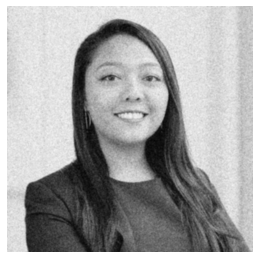

In [28]:
kernel = np.ones((5,5),np.float32)/25
filter2D = cv2.filter2D(gauss,-1,kernel)
imshow(filter2D)